In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../../prepared_data/outliers_cleaned.csv')

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,capital residences 360,sector 70a,1.69,8552.0,1976.0,Super Built up area 1976(183.58 sq.m.)Built Up...,3,3,3+,8.0,North-East,New Property,1976.0,1900.0,1650.0,0,1,0,0,0,0,165
1,flat,vatika city homes,sector 83,1.08,6206.0,1740.0,Super Built up area 1740(161.65 sq.m.)Carpet a...,3,3,3,6.0,South-West,Relatively New,1740.0,NaN,1350.0,0,0,1,0,0,0,111
2,flat,godrej summit,sector 104,1.30,7893.0,1647.0,Super Built up area 1647(153.01 sq.m.),3,3,3,8.0,NaN,New Property,1647.0,NaN,NaN,0,0,0,0,1,0,103
3,house,independent,sector 11,0.44,4251.0,1035.0,Carpet area: 115 (96.15 sq.m.),3,2,1,1.0,NaN,Relatively New,NaN,NaN,115.0,0,0,0,1,1,0,46
4,flat,sare petioles,sector 92,1.30,6373.0,2040.0,Built Up area: 2040 (189.52 sq.m.),4,4,0,7.0,NaN,Undefined,NaN,2040.0,NaN,0,0,0,0,0,0,0


In [397]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

In [6]:
sns.scatterplot(df['built_up_area'],df['super_built_up_area'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [7]:
sns.scatterplot(df['built_up_area'],df['carpet_area'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3752    False
3753    False
3754    False
3755    False
3756    False
Length: 3757, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(534, 23)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1048701298701298 0.900140056022409


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,vatika city homes,sector 83,1.08,6206.0,1740.0,Super Built up area 1740(161.65 sq.m.)Carpet a...,3,3,3,6.0,South-West,Relatively New,1740.0,NaN,1350.00,0,0,1,0,0,0,111
16,flat,suncity avenue,sector 102,0.47,8928.0,526.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,South-East,Relatively New,632.0,NaN,532.00,0,0,1,0,0,0,142
27,flat,shree vardhman flora,sector 90,0.92,4906.0,1875.0,Super Built up area 1875(174.19 sq.m.)Carpet a...,3,4,3,4.0,North-East,Relatively New,1875.0,NaN,1161.00,0,1,0,0,0,0,116
30,flat,emaar gurgaon greens,sector 102,1.42,8606.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,7.0,East,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,0,128
32,flat,emaar imperial gardens,sector 102,1.91,9550.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3,4,2,17.0,East,Relatively New,2000.0,NaN,1228.17,1,1,0,0,0,2,152


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1092
agePossession             0
super_built_up_area    1842
built_up_area          1629
carpet_area            1831
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,godrej summit,sector 104,1.30,7893.0,1647.0,Super Built up area 1647(153.01 sq.m.),3,3,3,8.0,NaN,New Property,1647.0,NaN,NaN,0,0,0,0,1,0,103
5,flat,tulip violet,sector 69,1.30,8445.0,1539.0,Super Built up area 1538(142.88 sq.m.),3,3,1,12.0,West,Relatively New,1538.0,NaN,NaN,0,0,0,1,0,2,94
8,flat,godrej aria,sector 79,1.69,8522.0,1983.0,Super Built up area 1983(184.23 sq.m.),3,3,2,7.0,South,Relatively New,1983.0,NaN,NaN,0,0,0,0,0,0,112
14,flat,orris aster court,sector 85,0.90,5671.0,1587.0,Super Built up area 1587(147.44 sq.m.),3,3,3,8.0,North-East,Relatively New,1587.0,NaN,NaN,0,0,0,0,0,0,49
15,flat,bestech park view grand spa,sector 81,4.50,10714.0,4200.0,Super Built up area 4200(390.19 sq.m.),4,6,3+,17.0,NaN,Relatively New,4200.0,NaN,NaN,0,1,0,0,0,2,44


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_

In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1092
agePossession             0
super_built_up_area    1842
built_up_area           726
carpet_area            1831
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,house,independent,sector 11,0.44,4251.0,1035.0,Carpet area: 115 (96.15 sq.m.),3,2,1,1.0,NaN,Relatively New,NaN,NaN,115.0,0,0,0,1,1,0,46
7,flat,rwa,sector 7,0.48,6000.0,800.0,Carpet area: 800 (74.32 sq.m.),3,2,1,1.0,North-East,New Property,NaN,NaN,800.0,0,0,0,0,0,0,21
12,flat,godrej nature plus,sector 33,1.25,9025.0,1385.0,Carpet area: 1385 (128.67 sq.m.),2,2,3+,15.0,NaN,Under Construction,NaN,NaN,1385.0,0,0,0,0,0,0,44
24,flat,gls arawali homes,sohna road,0.26,4513.0,576.0,Carpet area: 576 (53.51 sq.m.),2,2,2,5.0,East,New Property,NaN,NaN,576.0,0,0,0,0,0,0,78
25,flat,sidhivinayak apartments,sector 55,1.90,10555.0,1800.0,Carpet area: 1800 (167.23 sq.m.),4,3,3+,9.0,North,Moderately Old,NaN,NaN,1800.0,0,0,0,1,0,1,35


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fil

In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1092
agePossession             0
super_built_up_area    1842
built_up_area             0
carpet_area            1831
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

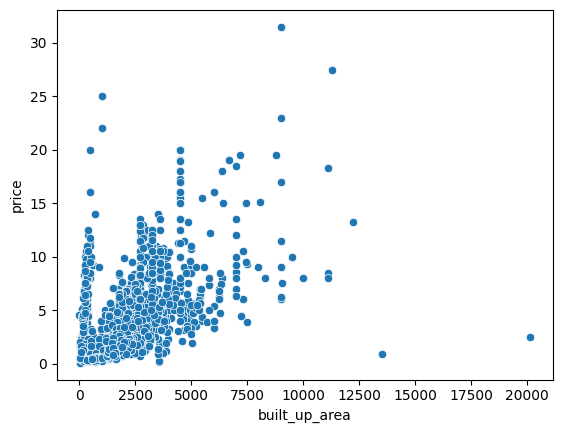

In [33]:
sns.scatterplot(x='built_up_area', y='price', data=df)

In [38]:
df = df[(df['built_up_area']<13000)]

In [39]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 5)][['price','area','built_up_area']]

In [40]:
anamoly_df.sample(5)

,price,area,built_up_area
1190,5.50,1800.0,1800.0
1288,5.15,3660.0,340.0
1186,6.81,1845.0,1845.0
3599,6.40,2592.0,240.0
3620,5.75,1935.0,1935.0


In [41]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [42]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

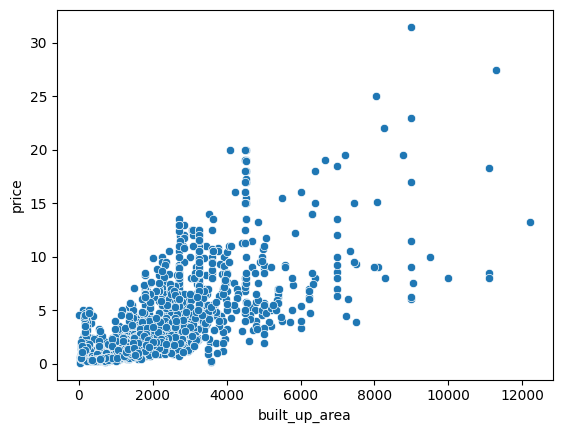

In [44]:
sns.scatterplot(x='built_up_area',y='price',data=df)

In [47]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [48]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,capital residences 360,sector 70a,1.69,8552.0,3,3,3+,8.0,North-East,New Property,1900.0,0,1,0,0,0,0,165
1,flat,vatika city homes,sector 83,1.08,6206.0,3,3,3,6.0,South-West,Relatively New,1537.0,0,0,1,0,0,0,111
2,flat,godrej summit,sector 104,1.30,7893.0,3,3,3,8.0,NaN,New Property,1490.0,0,0,0,0,1,0,103
3,house,independent,sector 11,0.44,4251.0,3,2,1,1.0,NaN,Relatively New,128.0,0,0,0,1,1,0,46
4,flat,sare petioles,sector 92,1.30,6373.0,4,4,0,7.0,NaN,Undefined,2040.0,0,0,0,0,0,0,0


In [49]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             19
facing             1092
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [50]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
58,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
157,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
591,house,uppal southend,sector 49,6.75,32328.0,12,12,3+,NaN,West,Moderately Old,2088.0,1,1,0,1,1,2,49
662,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1186,house,independent,sector 46,6.81,36911.0,12,14,3+,NaN,East,New Property,1845.0,0,1,0,0,1,2,40
1412,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1422,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,1,0
2097,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
2451,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
2523,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0


In [62]:
def bal(count):
    if count.split(' ')[0]=="3+":
        return 4
    elif count.split(' ')[0]=="No":
        return 0
    else:
        return int(count.split(' ')[0])
        
df['balcony']= df['balcony'].apply(bal)

In [65]:
# df[df['property_type'] == 'house']['floorNum'].median()
# Calculate the new values for floorNum where it is NaN
def calculate_floorNum(row):
    return (row['bedRoom']*400 + row['bathroom']*150 + row['balcony']*100)/row['built_up_area']

# Apply the calculation only to rows where floorNum is NaN and the property type is 'House'
df['floorNum'] = df.apply(lambda row: calculate_floorNum(row) if pd.isna(row['floorNum']) and row['property_type'] == 'house' else row['floorNum'], axis=1)

df.sample(10)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
535,flat,tulip violet,sector 69,1.44,9125.0,3,3,2,1.0,South,Relatively New,1381.0,0,0,0,1,0,0,174
3722,flat,godrej nature plus,sector 33,1.75,8768.0,3,3,0,2.0,NaN,Undefined,1996.0,0,0,0,0,0,0,56
3748,flat,parsvnath green ville,sector 48,1.42,8606.0,3,3,3,1.0,North-West,Moderately Old,1493.0,0,0,1,0,0,1,174
2309,house,vatika india next,sector 83,1.70,7870.0,3,3,4,4.0,North-West,New Property,2160.0,0,1,0,1,0,0,0
1848,flat,vatika xpressions,sector 88b,0.92,7360.0,2,2,2,3.0,North,Relatively New,1300.0,0,0,0,1,0,0,174
257,flat,ansal heights 86,sector 86,1.05,5541.0,3,3,3,9.0,North-East,Under Construction,1715.0,0,1,0,0,0,0,0
2298,house,independent,sector 12,1.70,8000.0,5,5,3,3.0,NaN,Moderately Old,2000.0,0,0,0,1,1,0,9
2625,flat,radhakrishna society,sector 23,0.55,5000.0,2,2,1,1.0,West,Moderately Old,995.0,0,0,0,0,0,2,29
3025,flat,dlf the primus,sector 82a,2.25,10714.0,3,3,4,29.0,East,Relatively New,2333.0,0,1,0,0,0,1,72
2628,flat,ireo skyon,sector 60,3.05,12788.0,3,3,3,9.0,South-East,Relatively New,2300.0,0,1,0,0,0,2,165


In [66]:
#df['floorNum'].fillna(2.0,inplace=True)

In [67]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              2
facing             1092
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [72]:
df = df[~df['floorNum'].isna()]

In [73]:
1011/df.shape[0]

0.26938449240607515

### facing

<AxesSubplot:ylabel='facing'>

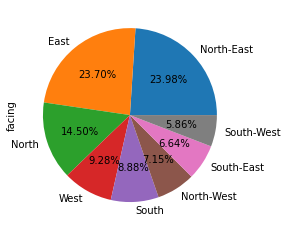

In [435]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [74]:
df.drop(columns=['facing'],inplace=True)

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\3119644739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['facing'],inplace=True)


In [75]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2711,flat,dlf the ultima,sector 81,2.45,11491.0,3,3,2,9.0,Relatively New,1800.0,0,1,0,0,0,2,174
2839,flat,la vida by tata housing,sector 113,3.00,14285.0,3,3,4,3.0,Relatively New,2460.0,0,1,0,0,0,0,167
2394,flat,tulip violet,sector 69,1.40,8856.0,3,3,2,9.0,Relatively New,1428.0,0,0,0,1,0,0,120
2332,flat,godrej nature plus,sector 33,1.55,9955.0,3,2,4,8.0,New Property,1730.0,0,0,0,0,0,0,43
3134,flat,godrej nature plus,sector 33,1.35,8231.0,3,2,4,7.0,Under Construction,1484.0,0,0,0,1,0,0,49


In [77]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [76]:
df[df['society'].isna()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


### agePossession

In [78]:
df['agePossession'].value_counts()

agePossession
Relatively New        1658
New Property           614
Moderately Old         568
Undefined              329
Old Property           306
Under Construction     278
Name: count, dtype: int64

In [79]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,flat,sare petioles,sector 92,1.30,6373.0,4,4,0,7.0,Undefined,2040.0,0,0,0,0,0,0,0
10,flat,satya the hermitage,sector 103,0.80,5517.0,2,2,0,10.0,Undefined,1450.0,0,0,0,0,0,0,61
37,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.0,0,0,0,0,0,0,0
44,house,dlf the arbour,sector 63,8.50,21519.0,4,4,4,27.0,Undefined,3950.0,0,0,0,0,0,0,61
66,house,independent,sector 3,0.90,8928.0,3,1,0,1.0,Undefined,1008.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,flat,godrej nature plus,sector 33,1.75,8768.0,3,3,0,2.0,Undefined,1996.0,0,0,0,0,0,0,56
3739,house,independent,sector 17,3.50,24306.0,6,6,4,3.0,Undefined,160.0,0,0,0,0,0,0,0
3740,house,independent,sector 92,1.80,7627.0,4,5,0,13.0,Undefined,2360.0,0,0,0,0,0,0,0
3745,flat,ashiana anmol,sector 33,1.10,8627.0,2,2,2,4.0,Undefined,1275.0,0,0,0,0,0,0,0


In [80]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [81]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\4034012990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agePossession'] = df.apply(mode_based_imputation,axis=1)


In [82]:
df['agePossession'].value_counts()

agePossession
Relatively New        1790
New Property           657
Moderately Old         612
Old Property           341
Under Construction     296
Undefined               57
Name: count, dtype: int64

In [83]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [84]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\3682362591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agePossession'] = df.apply(mode_based_imputation2,axis=1)


In [85]:
df['agePossession'].value_counts()

agePossession
Relatively New        1805
New Property           658
Moderately Old         619
Old Property           347
Under Construction     296
Undefined               28
Name: count, dtype: int64

In [86]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [87]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_13204\4276506457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agePossession'] = df.apply(mode_based_imputation3,axis=1)


In [88]:
df['agePossession'].value_counts()

agePossession
Relatively New        1805
New Property           658
Moderately Old         647
Old Property           347
Under Construction     296
Name: count, dtype: int64

In [89]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [463]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [464]:
df.shape

(3554, 18)

In [91]:
check_df = pd.read_csv('../../prepared_data/missing_value_imputed.csv')

In [92]:
check_df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [93]:
check_df.shape

(3753, 18)